GPT-4o 및 GPT-4o mini 소개
- GPT-4o("o"는 "omni"를 의미)와 GPT-4o mini는 기본적으로 텍스트, 오디오 및 비디오 입력의 조합을 처리하도록 설계된 멀티모달 모델이며 텍스트, 오디오 및 이미지 형식으로 출력을 생성할 수 있습니다. GPT-4o mini는 GPT-4o의 가벼운 버전입니다.

배경
- GPT-4o 이전에는 사용자가 세 개의 별도 모델로 작동하는 Voice Mode를 사용하여 ChatGPT와 상호 작용할 수 있었습니다. GPT-4o는 이러한 기능을 텍스트, 시각 및 오디오에서 학습된 단일 모델로 통합합니다. 이 통합된 접근 방식은 텍스트, 시각 또는 청각 여부에 관계없이 모든 입력이 동일한 신경망에서 응집적으로 처리되도록 합니다.
- GPT-4o mini는 이 omni 모델 제품군의 다음 반복으로 더 작고 저렴한 버전으로 제공됩니다. 이 모델은 GPT-3.5 Turbo보다 ​​정확도가 더 높은 동시에 속도가 빠르고 멀티모달 입력 및 출력을 지원합니다.

In [1]:
%pip install openai -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00


In [2]:
from openai import OpenAI
import os

MODEL = 'gpt-4o-mini-2024-07-18'
client = OpenAI(api_key ='' )

In [3]:
completion = client.chat.completions.create(
    model = MODEL,
    messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "Hello! Could you solve 2+2?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print('Asisstant:' + completion.choices[0].message.content)

Asisstant:Of course! \(2 + 2 = 4\).


### GPT-4o mini 모델 이미지 처리
####1. GPT-4o mini의 이미지 처리 능력
이미지 처리 및 작업 수행:
- GPT-4o mini는 이미지를 입력받아 해당 이미지에 대해 분석하거나, 그 이미지에 기반한 지능적인 작업을 수행할 수 있습니다.
- 예를 들어, 이미지를 설명하거나, 이미지의 특정 부분을 이해하고 그것에 대해 질문에 답할 수 있습니다.
이미지를 텍스트와 함께 처리하여 텍스트와 이미지를 결합한 종합적인 분석을 수행할 수 있습니다.

####2. 이미지를 제공하는 두 가지 형식
Base64 인코딩
- Base64 인코딩이란?:
  - Base64 인코딩은 이진 데이터를 텍스트 형식으로 변환하는 방법입니다. 이미지 파일과 같은 바이너리 데이터를 텍스트로 인코딩하여 네트워크를 통해 안전하게 전송할 수 있습니다.
  - 이미지를 Base64로 인코딩하면, 텍스트 문자열로 표현된 이미지를 API에 직접 전달할 수 있습니다.
- 사용 예:
  - 이미지를 읽어와서 Base64로 인코딩한 다음, 이를 API 요청의 본문에 포함시켜 GPT-4o mini에 전달합니다.
- 장점:
  - 이미지 파일을 직접 업로드할 필요 없이 텍스트 형태로 쉽게 전송할 수 있습니다.
  - 네트워크 전송 중에 파일이 손상되거나 변조되는 위험을 줄일 수 있습니다.

URL 링크
- URL 링크란?:
  - 이미지가 이미 인터넷에 업로드된 경우, 해당 이미지의 URL을 GPT-4o mini에 제공하여 모델이 해당 이미지를 직접 가져오도록 할 수 있습니다.
  - 이미지의 URL을 API 요청에 포함시키면, 모델이 해당 URL을 통해 이미지를 다운로드하고 분석을 수행합니다.
- 사용 예:
  - 인터넷에 있는 이미지의 URL을 제공하여 GPT-4o mini에 이미지 분석을 요청합니다.
- 장점:
  - 이미지 파일을 업로드할 필요 없이, 인터넷에 있는 이미지를 바로 사용할 수 있습니다.
  - 이미 많은 이미지가 웹에 존재하므로, 별도로 파일을 준비하지 않아도 됩니다.

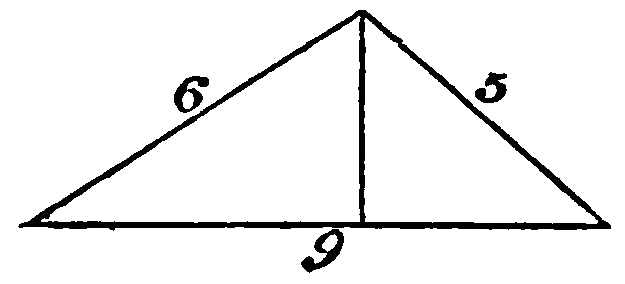

In [4]:
from IPython.display import Image, display, Markdown
import base64
IMAGE_PATH = '/content/drive/MyDrive/kdt_240424/m9_openai/data/tri.png'

display(Image(IMAGE_PATH))

In [8]:
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"}, # <-- This is the system message that provides context to the model
        {"role": "user", "content": [
            {'type':'text','text':"What's the area of the triangle?"},
            # data:image/png;base64는 이미지 데이터를 표현하는 방법으로, 이 문자열은 이미지가 PNG 형식이며, 뒤에 Base64로 인코딩된 데이터가 따라온다는
            {'type':'image_url','image_url':{'url':f"data:image/png;base64,{base64_image}"}
             }
        ]}
    ],
    temperature = 0.0
)

print(response.choices[0].message.content)

To find the area of the triangle, you can use the formula:

\[
\text{Area} = \frac{1}{2} \times \text{base} \times \text{height}
\]

In the triangle you provided:

- The base is \(9\) (the length at the bottom).
- The height is \(5\) (the vertical line from the top vertex to the base).

Now, plug in the values:

\[
\text{Area} = \frac{1}{2} \times 9 \times 5
\]

Calculating this gives:

\[
\text{Area} = \frac{1}{2} \times 45 = 22.5
\]

Thus, the area of the triangle is **22.5 square units**.


In [14]:
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!please do not use LaText or any math formatting"}, # <-- This is the system message that provides context to the model
        {"role": "user", "content": [
            {'type':'text','text':"What's the area of the triangle?"},
            # data:image/png;base64는 이미지 데이터를 표현하는 방법으로, 이 문자열은 이미지가 PNG 형식이며, 뒤에 Base64로 인코딩된 데이터가 따라온다는
            {'type':'image_url','image_url':{'url':f"data:image/png;base64,{base64_image}"}
             }
        ]}
    ],
    temperature = 0.0
)

print(response.choices[0].message.content)

To find the area of the triangle, you can use the formula:

Area = (base * height) / 2

In this triangle, the base is 9 and the height is 5. 

So, the area is:

Area = (9 * 5) / 2 = 45 / 2 = 22.5

The area of the triangle is 22.5 square units.


MIME 타입(Multipurpose Internet Mail Extensions type)
- 인터넷에서 파일이나 데이터의 형식을 지정하기 위해 사용하는 표준화된 방법
- 예시

  텍스트 파일
    - text/plain: 일반 텍스트 파일.
    - text/html: HTML 파일.

  이미지 파일
    - image/jpeg: JPEG 이미지 파일.
    - image/png: PNG 이미지 파일.
    - image/gif: GIF 이미지 파일.

  오디오 파일
    - audio/mpeg: MP3 오디오 파일.
    - audio/wav: WAV 오디오 파일.


  비디오 파일
  
    - video/mp4: MP4 비디오 파일.
    - video/webm: WebM 비디오 파일.
    
  응용 프로그램 파일

    - application/json: JSON 데이터 파일.
    - application/pdf: PDF 문서 파일.
    - application/zip: ZIP 압축 파일.

{"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}

In [12]:
response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {'role':'user','content':[
            {'type':'text','text':"What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]}
    ],
    temperature=0.0
)

print(response.choices[0].message.content.replace('\\',''))

To find the area of the triangle, you can use the formula:

[
text{Area} = frac{1}{2} times text{base} times text{height}
]

In the triangle you provided:

- The base is (9) (the length at the bottom).
- The height is (5) (the vertical line from the top vertex to the base).

Now, plug in the values:

[
text{Area} = frac{1}{2} times 9 times 5
]

Calculating this gives:

[
text{Area} = frac{1}{2} times 45 = 22.5
]

Thus, the area of the triangle is **22.5 square units**.


 주요 비디오 처리 단계는 다음과 같습니다:

프레임 추출:
- 코드에서 비디오의 프레임을 추출하여 base64로 인코딩하고, 이를 배열에 저장합니다.
- 이 부분에서 cv2(OpenCV)를 사용하여 비디오 파일을 읽고, 일정 간격으로 프레임을 추출합니다.

오디오 추출:
- MoviePy 라이브러리를 사용하여 비디오에서 오디오를 추출하고, 이를 MP3 파일로 저장합니다.
- 오디오 파일은 나중에 텍스트로 변환(음성 인식)되어 텍스트 분석에 사용될 수 있습니다.

비디오 및 오디오 처리 결과 사용:
- 비디오 프레임을 base64로 인코딩한 후, GPT-4o 모델에 전달하여 질문에 답변하는 데 사용됩니다.
- 오디오 트랜스크립션도 질문 응답에 사용되며, 프레임과 오디오를 결합한 분석도 수행됩니다.



비디오 처리를 위한 설정
- 비디오 처리를 위해 두 개의 파이썬 패키지인 opencv-python과 moviepy를 사용합니다.

In [15]:
# 주어진 url에 대해서 설명하는 기능을 수행하세요

response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {"role": "system", "content": "당신은 유명한 사진평론가입니다. "},
        {'role':'user','content':[
            {'type':'text','text':"이 사진이 어떤지 설명해줘"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"}
            }
        ]}
    ],
    temperature=0.0
)

print(response.choices[0].message.content)

이 사진은 넓은 초원과 하늘이 어우러진 아름다운 풍경을 담고 있습니다. 중앙에는 나무로 만들어진 보도가 길게 이어져 있어, 자연 속으로 들어가는 느낌을 줍니다. 초록색 풀과 식물들이 풍성하게 자생하고 있으며, 하늘은 푸르고 구름이 흩어져 있어 평화롭고 차분한 분위기를 자아냅니다. 전체적으로 자연의 아름다움과 고요함을 잘 표현한 장면입니다.


In [16]:
# 주어진 url에 대해서 설명하는 기능을 수행하세요

response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {"role": "system", "content": "당신은 유명한 사진평론가입니다. "},
        {'role':'user','content':[
            {'type':'text','text':"이 사진이 어떤지 비유를 들어서 설명해줘. 설명을 들었을 때 눈앞에 사진이 그려질정도로 자세하게 말해줘"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"}
            }
        ]}
    ],
    temperature=0.0
)

print(response.choices[0].message.content)

이 사진은 마치 자연의 품에 안겨 있는 듯한 평화로운 풍경을 담고 있습니다. 넓은 초원은 푸른 풀로 가득 차 있으며, 그 사이로 나무 데크가 길게 뻗어 있습니다. 이 길은 마치 자연과 인간을 연결하는 다리처럼 보입니다. 

하늘은 부드러운 파란색으로 물들어 있고, 흰 구름이 가벼운 솜사탕처럼 떠 있습니다. 햇살이 풀밭을 비추어, 풀잎들이 반짝이며 생명력을 느끼게 합니다. 초원의 끝자락에는 나무들이 무성하게 자라 있어, 그늘을 제공하며 자연의 조화를 이루고 있습니다.

이 풍경은 마치 고요한 음악이 흐르는 듯한 느낌을 주며, 걷고 싶은 마음을 자극합니다. 길을 따라 걸어가면, 바람에 흔들리는 풀의 소리와 함께 자연의 숨결을 느낄 수 있을 것 같습니다. 이곳은 일상의 번잡함에서 벗어나, 마음의 평화를 찾을 수 있는 안식처와도 같습니다.


비디오처리를 위한 설정

In [17]:
%pip install opencv-python -q
%pip install moviepy -q


In [18]:
import cv2
from moviepy.editor import VideoFileClip
import time
import base64

VIDEO_PATH = '/content/drive/MyDrive/kdt_240424/m9_openai/data/chatturbo.mp4'

In [21]:
# 비디오 파일에서 프레임과 오디오를 추출
def process_video(video_path, seconds_per_frame=2): # seconds_per_frame: 몇 초마다 프레임을 추출할지를 지정하는 매개변수
    base64Frames = [] # 추출한 프레임을 base64로 인코딩하여 저장할 리스트
    base_video_path, _ = os.path.splitext(video_path) # base_video_path: 비디오 파일의 확장자를 제거한 기본 경로

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS) # 비디오의 초당 프레임 수
    frames_to_skip = int(fps * seconds_per_frame) # 몇 개의 프레임을 건너뛰고 다음 프레임을 추출할지를 결정
    curr_frame=0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1: # 비디오의 끝에 도달할 때까지 지정된 간격에 따라 프레임을 추출
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame) # 현재 프레임 위치를 curr_frame으로 설정
        success, frame = video.read() # 현재 프레임을 읽어옵니다. success가 True면 읽기에 성공한 것이고, frame은 읽은 프레임 데이터를 담고 있습니다.

        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame) # 읽어온 프레임을 JPEG 이미지 형식으로 인코딩. buffer는 인코딩된 이미지 데이터
        base64Frames.append(base64.b64encode(buffer).decode("utf-8")) # 인코딩된 프레임을 base64Frames 리스트에 추가
        curr_frame += frames_to_skip # 다음 프레임 위치로 이동하기 위해 curr_frame을 업데이트
    video.release() # 비디오 파일을 닫아 자원을 해제

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3" # 원본 비디오 파일의 경로를 사용하며, 확장자를 .mp3로 변경하여 저장
    clip = VideoFileClip(video_path) # MoviePy를 사용하여 비디오 파일을 엽니다.
    clip.audio.write_audiofile(audio_path, bitrate="32k") # 비디오 파일에서 오디오를 추출하여 MP3 파일로 저장. bitrate="32k"는 오디오의 비트레이트(음질)를 설정하는 옵션
    clip.audio.close() # 오디오 및 비디오 파일을 닫아 자원을 해제
    clip.close()

    print(f"Extracted {len(base64Frames)} frames") # 추출된 프레임의 수를 출력
    print(f"Extracted audio to {audio_path}") # 추출된 오디오 파일의 경로를 출력
    return base64Frames, audio_path

# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1)


MoviePy - Writing audio in /content/drive/MyDrive/kdt_240424/m9_openai/data/chatturbo.mp3


MoviePy - Done.
Extracted 211 frames
Extracted audio to /content/drive/MyDrive/kdt_240424/m9_openai/data/chatturbo.mp3


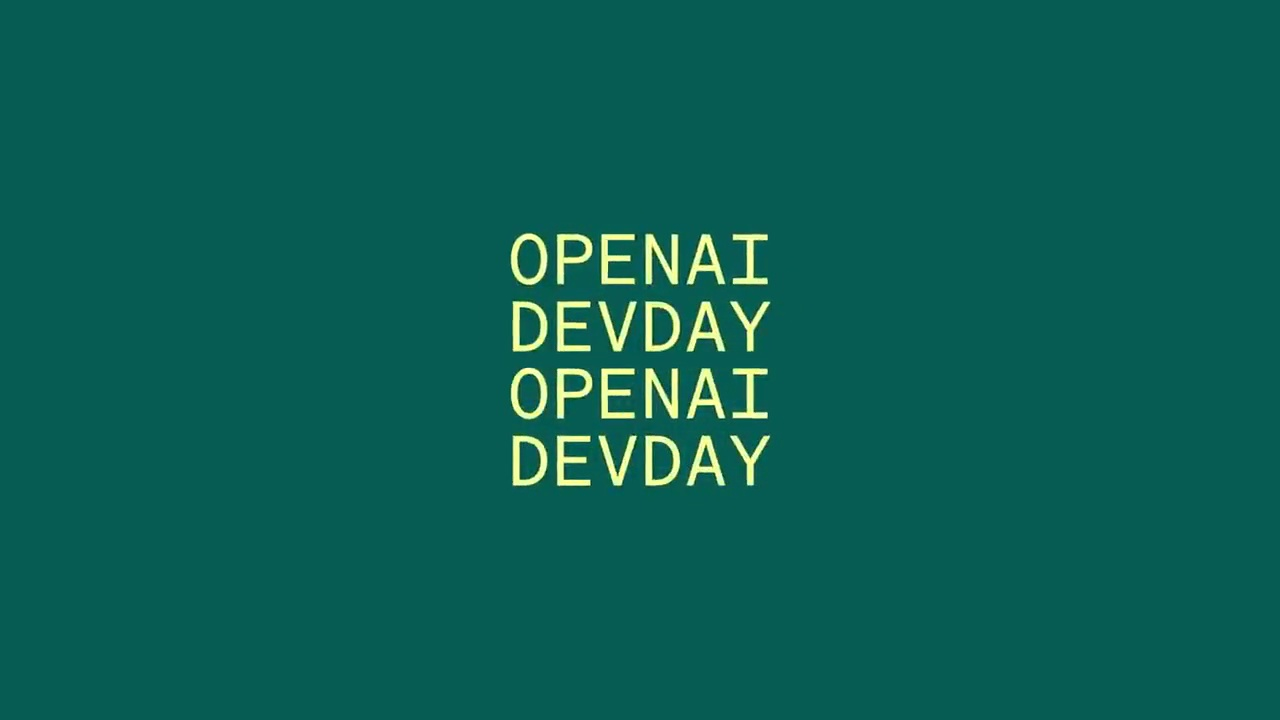

In [23]:
# 비디오에서 추출한 프레임과 오디오를 사용하여 GPT-4o-mini  모델을 통해 비디오의 요약

display_handle = display(None, display_id = True)

for img in base64Frames: #base64Frames 리스트에 저장된 base64로 인코딩된 이미지 프레임들을 순차적으로 디스플레이
    display_handle.update(Image(data=base64.b64decode(img.encode('utf-8')), width = 600)) # 디코딩된 이미지를 image 객체로 변환하여 표시
    time.sleep(0.025)

In [26]:
from IPython.display import Audio
Audio(audio_path)

#### 예제 1: 요약
- 이제 비디오 프레임과 오디오가 모두 있으므로 몇 가지 다른 테스트를 실행하여 비디오 요약을 생성하고 다른 모달리티의 모델을 사용한 결과를 비교해보겠습니다. 모델이 비디오의 전체 컨텍스트를 사용할 수 있으므로 시각적 및 오디오 입력의 컨텍스트로 생성된 요약이 가장 정확할 것으로 예상됩니다.

  1. 시각적 요약
  2. 오디오 요약
  3. 시각적 + 오디오 요약

시각적 요약
- 시각적 요약은 비디오의 프레임만 모델에 보내서 생성됩니다. 프레임만 사용하면 모델은 시각적 측면을 포착할 가능성이 있지만 화자가 논의한 세부 사항은 놓칠 것입니다.

In [28]:
response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {'role':'system','content':'You are generating a video summary. Please provide a summary of the video. Respond in Markdown'},
        {'role':'user','content':[
            "These are the frames from the video.",
            *map(lambda x: {'type':'image_url', #map에서 *은 map함수의 결과를 개별 요소로 언패킹하는데 사용
                            'image_url':{'url':f'data:image/jpg;base64,{x}', 'detail':'low'}}, base64Frames)
        ], #map함수는 여러 요소를 포함한 iterator를 반환하며, 이 iterator를 개별 요소로 분리하여 다른 iterable에 전달하거나 함수 호출의 개별인수로 전달 할 수 있습니다
         }
    ],
    temperature=0
)

print(response.choices[0].message.content)

# OpenAI Dev Day Summary

## Overview
The video captures highlights from OpenAI's Dev Day, showcasing new advancements and features in AI technology, particularly focusing on the latest developments in the GPT-4 model and its applications.

## Key Highlights

### Event Introduction
- The event is branded as "OpenAI Dev Day," setting the stage for discussions on AI advancements.

### Keynote Recap
- The keynote presentation includes a recap of significant updates and features introduced during the event.

### New Features and Models
- Introduction of **GPT-4 Turbo** and **DALL·E 3**, emphasizing improvements in performance and capabilities.
- Discussion on **custom models** and how developers can leverage these tools for various applications.

### Technical Enhancements
- **Function Calling**: Demonstrations of how the new function calling feature enhances user interaction with AI.
- **JSON Mode**: Introduction of a mode that allows for structured data handling, improving the AI's abili

결과는 예상대로입니다. 모델은 비디오 비주얼의 높은 수준의 측면을 포착할 수 있지만, 연설에서 제공된 세부 사항은 놓칩니다.

오디오 요약
- 오디오 요약은 모델에 오디오 대본을 보내서 생성됩니다. 오디오만 있는 경우 모델은 오디오 콘텐츠에 편향될 가능성이 높고 프레젠테이션과 비주얼에서 제공하는 맥락을 놓칠 것입니다.

- GPT-4o용 `{audio}` 입력은 현재 사용할 수 없지만 곧 제공될 예정입니다! 지금은 기존의 `whisper-1` 모델을 사용하여 오디오를 처리합니다.

In [30]:
transcription = client.audio.transcriptions.create( #OpenAI의 Whisper 모델을 사용하여 오디오 파일을 텍스트로 변환하는  API를 호출
    model = 'whisper-1',
    file = open(audio_path, 'rb'),
)




response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {'role':'system','content':'You are generating a transcript summary. Create a summary of the provided transciption. Respnd in Markdown.'},
        {'role':'user','content':[
            {'type':'text','text':f'The audio transcription is : {transcription.text}'}
        ]}
    ],
    temperature = 0
)

print(response.choices[0].message.content)

# OpenAI Dev Day Summary

On the inaugural OpenAI Dev Day, several significant updates and features were announced:

- **Launch of GPT-4 Turbo**: This new model supports up to 128,000 tokens of context and is designed to follow instructions more effectively. It has knowledge of the world up to April 2023 and will continue to improve.

- **New Features**:
  - **JSON Mode**: Ensures responses are in valid JSON format.
  - **Function Calling**: Allows multiple functions to be called simultaneously.
  - **Retrieval Capability**: Users can integrate external knowledge from documents or databases into their applications.

- **DALL-E 3 and Text-to-Speech**: These models are now available in the API alongside GPT-4 Turbo.

- **Custom Models Program**: OpenAI will collaborate with companies to create tailored models for specific use cases.

- **Increased Rate Limits**: Established GPT-4 customers will see a doubling of tokens per minute, with options to request further changes in their API sett

오디오 요약은 연설 중에 논의된 내용에 편향되어 있지만 비디오 요약보다 구조가 훨씬 부족합니다.

오디오 + 비주얼 요약
- 오디오 + 비주얼 요약은 모델에 비디오의 비주얼과 오디오를 동시에 보내서 생성됩니다. 둘 다 보낼 때 모델은 전체 비디오를 한 번에 인식할 수 있으므로 더 잘 요약할 것으로 예상됩니다.
- 비디오와 오디오를 모두 결합한 후, 비디오의 시각적 요소와 오디오 요소에서 정보를 사용하여 이벤트에 대한 훨씬 더 자세하고 포괄적인 요약을 얻을 수 있습니다.

In [31]:

response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {'role':'system','content':'You are generating a video summary. Create a summary of the provided video and its transciption. Respnd in Markdown.'},
        {'role':'user','content':[
            "These are the frames from the video.",
            *map(lambda x: {'type':'image_url', #map에서 *은 map함수의 결과를 개별 요소로 언패킹하는데 사용
                            'image_url':{'url':f'data:image/jpg;base64,{x}', 'detail':'low'}}, base64Frames),
            {'type':'text','text':f'The audio transcription is : {transcription.text}'}
        ]}
    ],
    temperature = 0
)

print(response.choices[0].message.content)


# OpenAI Dev Day Summary

## Overview
The first-ever OpenAI Dev Day introduced several exciting updates and features, primarily focusing on the launch of **GPT-4 Turbo**. This new model enhances capabilities and offers significant improvements for developers.

## Key Announcements

### 1. **GPT-4 Turbo**
- **Token Support**: Supports up to **128,000 tokens** of context.
- **Cost Efficiency**: GPT-4 Turbo is **3x cheaper** for prompt tokens and **2x cheaper** for completion tokens compared to GPT-4.

### 2. **New Features**
- **JSON Mode**: Ensures responses are in valid JSON format.
- **Function Calling**: Allows multiple functions to be called simultaneously, improving instruction adherence.
- **Retrieval Feature**: Enables models to access external knowledge from documents or databases.

### 3. **DALL-E 3 and Vision Capabilities**
- Integration of **DALL-E 3**, **GPT-4 Turbo with Vision**, and a new **Text-to-Speech model** into the API.

### 4. **Custom Models Program**
- Collaborat

비디오/오디오 요약:

이번 OpenAI Dev Day에서는 새로운 모델인 GPT-4 Turbo가 출시되었습니다. 이 모델은 최대 128,000개의 토큰을 지원하며, JSON 모드라는 새로운 기능이 추가되어 모델이 유효한 JSON으로 응답할 수 있습니다. 여러 기능을 동시에 호출할 수 있으며, 일반적으로 지침을 더 잘 따릅니다. 또한, 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 검색 기능이 도입되었습니다. GPT-4 Turbo는 2023년 4월까지의 세계에 대한 지식을 가지고 있으며, 지속적으로 개선될 예정입니다.

DALL·E 3, GPT-4 Turbo with Vision, 그리고 새로운 텍스트 음성 변환 모델이 API에 추가되었습니다. Custom Models 프로그램도 시작되어, 연구자들이 기업과 협력하여 맞춤형 모델을 개발할 수 있도록 지원합니다. 모든 기존 GPT-4 고객의 경우 분당 토큰 수가 두 배로 증가하여 더 많은 작업을 수행할 수 있게 되며, API 계정 설정에서 추가적인 속도 제한 및 쿼터 변경 요청이 가능합니다.

GPT-4 Turbo는 프롬프트 토큰에 대해 3배, 완료 토큰에 대해 2배 저렴해졌습니다. GPT는 특정 목적에 맞춘 ChatGPT의 맞춤형 버전으로, 지침, 확장된 지식, 행동을 결합하여 더 유용하게 사용할 수 있습니다. 코딩을 모르는 사용자도 대화만으로 GPT를 프로그래밍할 수 있으며, 개인 GPT를 만들거나 공개 링크를 통해 공유할 수 있습니다.

API에도 같은 개념이 적용되어, 지속적인 스레드, 내장 검색, 코드 해석기, 개선된 기능 호출 등이 포함된 Assistance API가 제공됩니다. 이러한 기술이 통합됨에 따라, 모든 사용자가 즉시 슈퍼파워를 가질 수 있게 될 것입니다.

마지막으로, 오늘 발표된 내용은 앞으로 개발될 기술에 비해 매우 간단하게 느껴질 것이라고 하며, 참석자들에게 감사의 인사를 전했습니다.

#### 예제 2: 질의응답

Q&A의 경우, 이전과 동일한 개념을 사용하여 처리된 비디오에 질문을 하고 동일한 3가지 테스트를 실행하여 입력 모달리티를 결합하는 이점을 보여줍니다.
1. 시각적 Q&A
2. 오디오 Q&A
3. 시각적 + 오디오 Q&A
bidiowa odioleul modu gyeolhabha

In [33]:
QUESTION = 'Qustion : Why did Sam Altman have an example about raising windows and turning the radio on?'

In [34]:
qa_visual_response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {'role':'system','content':'Use the video to answer the provided question. Respond in Markdown'},
        {'role':'user','content':[
            "These are the frames from the video.",
            *map(lambda x: {'type':'image_url','image_url':{'url':f'data:image/jpg;base64,{x}','detail':'low'}},base64Frames),
            QUESTION
        ]}
    ],
    temperature=0
)

print("Visual QA:\n" + qa_visual_response.choices[0].message.content)

Visual QA:
Sam Altman used the example of raising windows and turning the radio on to illustrate the concept of function calling in AI. This example demonstrates how AI can interpret natural language commands and translate them into specific functions or actions. By using relatable scenarios, he aimed to show how AI can enhance user interaction by understanding and executing multiple tasks based on simple instructions. This highlights the advancements in AI's ability to process and respond to complex requests in a more intuitive manner.


In [35]:
qa_audio_response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {'role':'system','content':'Use the transciption the answer the provided question. Respond in Markdown'},
        {'role':'user','content':f'The audio transcription is : {transcription.text} . \n\n {QUESTION}'}
    ],
    temperature=0
)

print("Audio QA:\n" + qa_audio_response.choices[0].message.content)

Audio QA:
The transcription provided does not include any mention of Sam Altman discussing raising windows or turning the radio on. Therefore, I cannot provide an answer to that specific question based on the given transcription. If you have more context or another excerpt that includes that example, please share it, and I would be happy to help!


In [37]:
qa_both_response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {'role':'system','content':'Use the video adn transciption to answer the provided question.'},
        {'role':'user','content':[
                "These are the frames from the video.",
            *map(lambda x: {'type':'image_url','image_url':{'url':f'data:image/jpg;base64,{x}','detail':'low'}},base64Frames),
                {'type':'text','text':f'The audio transcription is: {transcription.text}'},
            QUESTION
        ]}
    ],
    temperature=0
)

print("Both QA:\n" + qa_both_response.choices[0].message.content)

Both QA:
Sam Altman used the example of "raising windows and turning the radio on" to illustrate the new function calling feature in the GPT-4 Turbo model. This example demonstrates how the model can handle multiple commands simultaneously, allowing for more complex interactions. By showing how the model can interpret and execute both actions—raising the windows and turning on the radio—he highlighted the improved capabilities of the model in understanding and executing user instructions effectively. This reflects the advancements in the model's ability to manage tasks in a more intuitive and efficient manner.
